In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.ion()

In [2]:
true_b, true_w = 1, 2
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
y = true_b + true_w * x + (0.1 * np.random.randn(N,1))

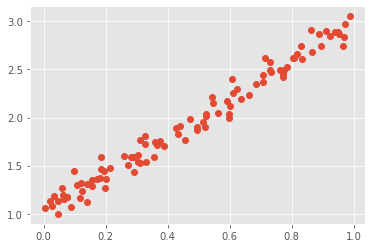

In [3]:
plt.grid(True)
plt.plot(x, y, 'o')

Split the dataset in train/test-validation subsets

In [5]:
idx = np.arange(N)
np.random.shuffle(idx)
train_frac = 0.8 # fraction of dataset to use for training
train_idx = idx[:int(N*train_frac)]
val_idx = idx[int(N*train_frac):]

In [6]:
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [7]:
import torch as T

In [8]:
device = 'cuda' if T.cuda.is_available() else 'cpu'

In [9]:
x_train_tensor = T.as_tensor(x_train).float().to(device)
y_train_tensor = T.as_tensor(y_train).float().to(device)

In [10]:
learn_rate = 0.1
T.manual_seed(42)
model = T.nn.Sequential(T.nn.Linear(1,1)).to(device)
optimizer = T.optim.SGD(model.parameters(), lr = learn_rate)
loss_fn = T.nn.MSELoss(reduction='mean')

A simple training loop

In [11]:
n_epochs = 100

for _ in range(n_epochs):
    model.train()
    yhat = model(x_train_tensor)
    loss = loss_fn(yhat, y_train_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

In [12]:
model.state_dict()

OrderedDict([('0.weight', tensor([[1.7777]])), ('0.bias', tensor([1.1213]))])